
# BACKPROPAGATION: A REVIEW

### **Agenda:**
- A recap of neural netrworks (MLPs)
- Feed forward phase
- Idea and implementation of backpropagation (Stochastic gradient descent) 
- Pen- and paper-example 

### **Multilayer perceptron network**
A type of neural network that can be used for _classification_ or _regression_. Consists of:
- Input neurons
- Layer(s) of hidden neurons
- Output layer 
- Weights connecting neurons between layers
- Activation function(s)

Today we take a look at an MLP with a single hidden layer and the problem of classification. 


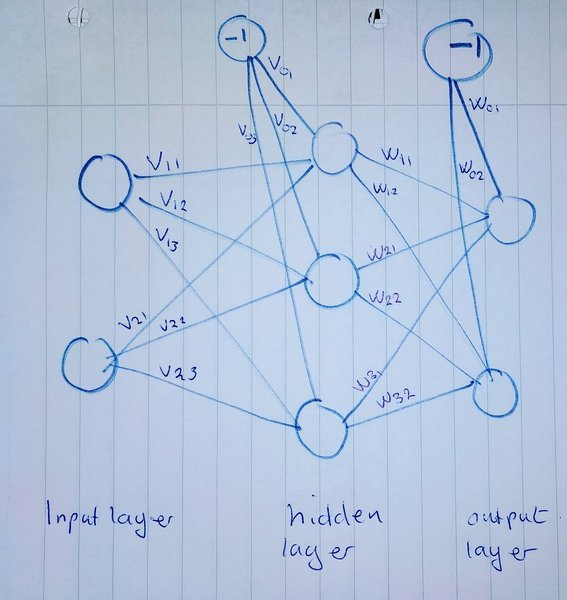

The input data comes in through the nodes on the left - the input nodes. The top node takes in $x_1$, the bottom node takes $x_2$. Then, the values in the input nodes together with the bias get multiplied with the weights going out from the nodes, and accumulated in the hidden nodes they connect to. A weight $V_{i, j}$ sends a signal _from_ node $i$ into node $j$. 

The nodes slightly outside the networks with the values $-1$ are _bias_ nodes. We need there to ensure that an input vector with only 0s is not always mapped onto a 0-vector, which would have happened without the bias nodes.  

Let's put some numbers in and see how the input gets passed into the hidden layer. 

## A forward pass with some made-up numbers. 
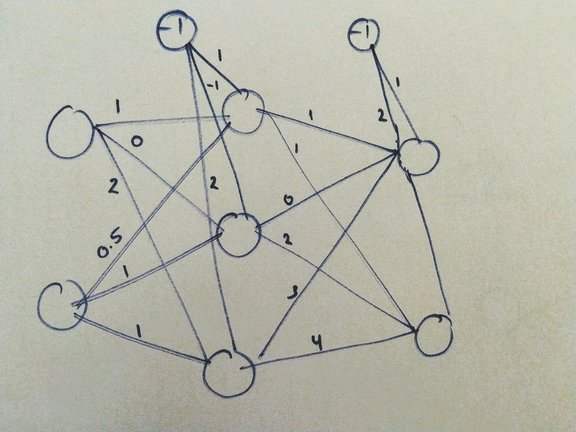

Let's assume the input data $\mathbf{x} = [1, 2]$ is a row vector which belongs to class $0$.
Then, the input to the first hidden neuron $ \textit{h}_1$ is 
$$-1\cdot V_{0, 1} + x_1 \cdot V_{1, 1} + x_2 \cdot V_{2, 1} $$ 
$$ = -1 \cdot 1 + 1 \cdot 1 + 2\cdot 0.5$$
$$ = 1$$ 

Similarly, the input to hidden neurons 2 and 3 is: 
$$-1 \cdot -1 + 1 \cdot 0 + 2\cdot 1 = 3$$ and 
$$ -1 \cdot 2 + 1 \cdot 2 + 2\cdot 1 = 2$$

This means that the signal going into the hidden neurons is $[1, 3, 2]$.

The next step is to apply the logistic (sigmoid) activation function to this vector. This gives a new vector $$\mathbf{a} = [a_1, a_2, a_3] = [\sigma(1), \sigma(3), \sigma(2)] = [0.731,  0.953, 0.881],$$ which is the activation going out from the hidden layer. Now we simply repeat what we did from the input layer to the hidden layer: We take this signal, multiply with the outgoing weights (remember the bias!) and sum the input to each node in the output layer. 

The input to output node 1 is: 
$$o_1 = -1\cdot 1 + 0.731\cdot 1 + 0.953 \cdot 0 + 0.881 \cdot 3 = 2.374,$$
$$o_2 = -1\cdot 2 + 0.731\cdot 1 + 0.953 \cdot 2 + 0.881 \cdot 4 = 4.161.$$

Finally, we take the activation function on the output vector: 
$$\mathbf{y} = \sigma(\mathbf{o}) = [\sigma(2.374), \sigma(4.161)] = [0.915, 0.985].$$

Since the second of the two values is the largest, we predict that the *class* of $\mathbf{x}$ was $[0, 1]$, which encodes class one. 


#### Weights as matrices: 
Let's organize all the weights in V in a matrix: 
$$V = \begin{bmatrix} V_{0, 1} & V_{0, 2} & V_{0, 3}\\
                  V_{1, 1} & V_{1, 2} & V_{1, 3}\\
                  V_{2, 1} & V_{2, 2} & V_{2, 3}
\end{bmatrix}$$ 

The product 
 
$$[-1, x_1 , x_2]  \begin{bmatrix} V_{0, 1} & V_{0, 2} & V_{0, 3}\\
                  V_{1, 1} & V_{1, 2} & V_{1, 3}\\
                  V_{2, 1} & V_{2, 2} & V_{2, 3} \end{bmatrix}  = [h_1, h_2, h_3]
                 $$
                 
                 
(If you're in doubt, recall that $h_1 = -1\cdot V_{0, 1} + x_1 \cdot V_{1, 1} + x_2 \cdot V_{2, 1}$, <br>
which is exactly the same as the row vector $[-1, x_1, x_2]$ times the first column in $V$).   

Notice also how column $k$ in the weight-matrix corresponds to all the connections going into node k.

In the same way, we organize the weights in the second layer into a matrix:

$$W = \begin{bmatrix} W_{0, 1} & W_{0, 2}\\
                  W_{1, 1} & V_{1, 2} \\
                  W_{2, 1} & W_{2, 2} \\
                  W_{3, 1} & W_{3, 2}
\end{bmatrix}$$ 

## The forward pass, all in matrix form: 

 - Calculate the input to the hidden neurons:     $\mathbf{h} = [-1, x_1, x_2] V$
 
 - Calculate the acivated signal _out_ of the hidden layer:        $\mathbf{a} = \sigma(\mathbf{h})$
 
 - Pass the signal through the weights in W:       $\mathbf{o} =  [-1, a_1, a_2, a_3]  W$
 
 - Apply the activation function to the signal into the output neurons: $\mathbf{y} = \sigma([o_1, o_2]) = [y_1, y_2]$ 



But how well did we do? Could we do better? Remember that $\mathbf{x} = [1, 2]$ in fact belonged to class 0. Ideally, we wanted the prediction $\mathbf{y}$ to be close to $[1, 0]$ which corresponds to class 0.

### The loss function
To evaluate how far off target we are, we use the loss function $E(V, W;  \mathbf{y}, \mathbf{t})= \frac{1}{2}\sum_{k=1}^m(y_k-t_k)^2$, where $m$ is the number of output nodes, and it gets closer to $0$ as the prediction approaches the target value. I write $E(V, W;\mathbf{x}, \mathbf{y})$ to emphasize that $E$ is a function that changes depending on the weights. <br>

That means $E\left(V, W; [1, 2], [1, 0]\right) = ((0.915-1)^2 + (0 -0.985)^2 ) = 0.488725$. We want to make this error smaller. Since we can't change the input-data or the target, we can only try to change some weights.

<!-- <br><br> -->

Let's try to change the weight from the last hidden neuron $h_3$ into the second output neuron: We set $W_{3, 2} = 0$

Feeding the signal forward gives the output $\mathbf{y} = [0.915, 0.654]$ and the loss is $(0.085^2 + (-0.654)^2)/2 = 0.2174705$, which is closer to what we wanted! 

## Finally, backpropagation!

As we just saw, we can influence the error by changing the weights. In this simple example, we used the method of staring at the weights and thinking about which output we wanted to make smaller. But we need a more structured approach.

**Enter the gradient**!

As we remember, the gradient of a function consists of the _partial derivatives_ of the function with respect to each variable, and **points in the direction of the steepest increase** of the function. 

We want to use this information. The goal is to find the gradient of the **loss function**, which tells us how to change the weights to make the loss function $E$ increase as fast as possible, and do the **exact opposite!** 

In mathematical terms, we want to identify the gradient of the loss function $\nabla$E. If we denote all the weights in the neural network $\theta$ and $\gamma$ is a step size, we update the weights like this: 


$$\theta = \theta - \gamma \nabla E.$$

That's it. This is the heart and sole of supervised machine learning - **gradient descent**. The only tricky part is to figure out what the gradient of the loss function is. This is essentially figuring out all the partial derivatives <br> <br> $$\frac{ \partial E}{\partial W_{i, j}} \text{ and } \frac{ \partial E}{\partial V_{m, n}}  $$  <br>for all the weights in the MLP. This involved a repeated application of the chain rule. We will skp the details of the calculations, since the differentiaon in iself is not all that interesting. 

## Adjusting the weigths in the output layer: 

At each node $j$ in the output layer we calculate the _error term_ :
    $\delta_j =\underset{{\text{Derivative of logistic}}}{\underbrace{y_j(1-y_j)}}\overset{\text{Outer derivative of E}}{\overbrace{(t_j - y_j)}}$

The **change** in $W_{i, j}$ - the weight from hidden hode $i$ into output node $j$ is 
$\delta_j\cdot a_i$ - where $a_i$ is the signal going out of hidden node $i$, so we update 
the weight $W_{i, j}$ like this: 

$W_{i, j} = W_{i, j} + \gamma \cdot \delta_j \cdot a_i$, where $\gamma$ is the step-size. We will get to an example in a little bit. 

## Adjusting the weigths in the hidden layer: 


The question is now: How do we find the partial derivatives of the loss-function $E$ with respect to the weights in the hidden layer? This is done by a repeated application of the chain rule, but we will not go into the details of the mathematic. Let's instead look at how to use the the results.

We want to calculate error terms for each of the hidden nodes. For hidden node $l$ this error term is: 
$$\Delta_{l} = a_l(1-a_l)\cdot \sum_{j=1}^{m} W_{l, j}\delta_j.$$

It looks complicated, but it's not, let's break it down. 

 - $a_l$ is the signal from hidden node $l$
 - $m$ in the sum is the number of output nodes.
 - $\sum_{j=1}^{m} W_{l, j}\delta_j$ is the sum of error trems **from each output node** passed **through the weight connecting to hidden node $l$** 

We are taking the error signal at the output layer, and passing it **backwards** through the weights into the hidden layer. 
#### Notice: We are not using the weights connecting to the bias node in this backwards phase. 

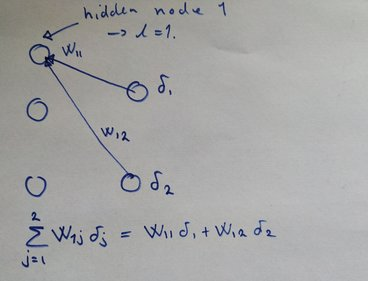


After we have calculated the hidden errors for each hidden neuron, we update the weights in the first layer: 

$$V_{i, j} = V_{i, j} + \gamma \cdot  \Delta_{j}x_{i},$$ where 
$\Delta_{j}$ is the hidden error in hidden node j, $V_{i, j}$ is the weight from input node $i$ into hidden node $j$ and $x_i$ is the input to input node $i$.

**That's it. We now have an efficient way to adjust evrey weight in the MLP to reduce the loss, guided by the error made on the prediction of $\mathbf{x}$!**



Let's repeat the steps in order: 
 - Feed forward phase: Take the input $\mathbf{x}$ and feed it forward to produce the prediction $\mathbf{y} = [y_1, \dots, y_m]$ - in our case $[y_1, y_2]$
 - Calculate the error terms in the output layer: $\boldsymbol \delta$  = $[\delta_1, \dots ,\delta_m] -$ in our case $[\delta_1, \delta_2]$ according to $\delta_j = y_j(1-y_j)(t_j - y_j)$
 - Calculate the hidden errors $\boldsymbol \Delta = [\Delta_1, \dots, \Delta_n]$ in the hidden layer according to 
 
 
 $$\Delta_l = \underset{\text{Activated signal from hidden neuron l}}{\underbrace{a_l}}\cdot(1-a_l)\cdot \sum_{j=1}^m \left( \underset{\text{output error}}{\underbrace{\delta_j}} \cdot \overset{\text{Weight between hidden neuron }l\text{ and output neuron j}}{\overbrace{W_{l, j}}}\right) $$
 
- Update each weight in the **output layer** according to 

$$W_{i, j} = \underset{\text{Weight from hidden node i to output node j}}{\underbrace {W_{i, j}}} + \overset{\text{step size}}{\overbrace{\gamma}} \cdot \underset{\text{output error in output j}}{\underbrace{\delta_j}} \overset{\text{Activated signal from hidden node i}}{\overbrace{a_i}}.$$

- Update each weight in the **input layer** according to 

$$V_{i, j} = \underset{\text{Weight from input node i to hidden node j}}{\underbrace {V_{i, j}}} + \overset{\text{step size}}{\overbrace{\gamma}} \cdot \underset{\text{error in hidden node j}}{\underbrace{\Delta_j}} \overset{\text{input feature i}}{\overbrace{x_i}}.$$


<font color="grey">_For those who wonder why we don't have a minus sign when we add the gradient of the loss function to the previous weights, the explanation is that $(t-y) = -(y-t)$. The minis has been eaten up by reordering the terms in this expression_ </font>

## A pen and paper-example

Let's come back to our toy example we initially looked at. The MLP had the following weight matrices: 
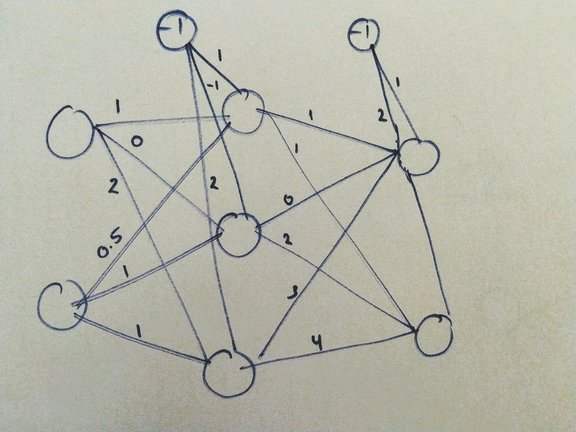

$$V = \begin{bmatrix} 1 & -1 & 2\\
                  1 & 0 & 2\\
                  0.5 & 1 & 1\end{bmatrix} , \quad W = \begin{bmatrix}
                  1 & 2 \\
                  1 & 1 \\
                  0 & 2 \\
                  3 & 4
\end{bmatrix}$$ 

We had $\mathbf{x} = [1, 2]$, and got after the feed forward step $\mathbf{y} = [0.915, 0.985]$. The target was $\mathbf{t} = [1, 0]$. We calculated $\mathbf{a} = {a_1, a_2, a_3} = \sigma([1, 3, 2]) = [0.731,  0.953,   0.881]$, which was the activated signal in the hidden neurons.
                 
We begin to find the error terms in the output: 
\begin{align}
\delta_1 &= y_1(1-y_1)(t_1-y_1)\\
        & = 0.915 \cdot 0.085 \cdot 0.085\\
        & = 0.00661
\end{align}
\begin{align}
\delta_2 &= y_2(1-y_2)(t_2-y_2)\\
        & = 0.985 \cdot 0.015 \cdot -0.985\\
        & = -0.0146
\end{align}

Next, we calculate the errors in the hidden layer: 
\begin{align}
\Delta_l &= a_l(1-a_l)\cdot \sum_{j=1}^{m} W_{l, j}\delta_j, 
\end{align}
so
\begin{align}
\Delta_1 &= a_1(1-a_1)\cdot \sum_{j=1}^{2} W_{1, j}\delta_j\\
         &= 0.731\cdot 0.269 \cdot \left( 1 \cdot 0.00661 + 1 \cdot -0.0146  \right)\\
         &= -0.00157.\\         
\Delta_2 &= a_2(1-a_2) \cdot \sum_{j=1}^{2} W_{2, j}\delta_j\\
         &= 0.953 \cdot 0.047 \cdot \left(0 \cdot 0.00661 + 2 \cdot -0.0146  \right) \\
         &= -0.0013\\
\Delta_3 &= a_3(1-a_3)\cdot \sum_{j=1}^{2} W_{3, j}\delta_j\\
         &= 0.881 \cdot 0.119 \cdot \left( 1 \cdot 0.00661 + 4 \cdot -0.0146  \right)\\         
         &= -0.0054
.\end{align}
All in all: 

$\boldsymbol \delta = [0.00661, -0.0146]$ - output errors, 


$\boldsymbol \Delta = [-0.00157, -0.0013, -0.0054]$ - hidden errors

Finally, we can update the weights, beginning with the output weights. Let's set the step size $\gamma = 1$ for simplicity - in reallity this is a very bad idea, it should usually be much smaller! 

The update rule is $W_{i, j} \leftarrow W_{i, j} + \gamma a_i \delta_j$. I used the $\leftarrow$-notation to signify that we are updating the variable, not solving an equation.
\begin{align}
W_{0, 1} & \leftarrow W_{0, 1} +\cdot 1 \cdot \underset{\text{signal from bias node}}{\underbrace{-1}} \cdot \delta_1\\
        & =1 +  1 \cdot -1 \cdot 0.00661\\
        & = 0.99339\\
W_{0, 2} & \leftarrow W_{0, 2} +\cdot 1 \cdot \underset{\text{signal from bias node}}{\underbrace{-1}} \cdot \delta_2\\
        & = 2  +  1 \cdot -1 \cdot -0.0146\\
        & = 2.0146\\        
W_{1, 1} & \leftarrow W_{1, 1} +\cdot 1 \cdot \underset{\text{signal from hidden node 1}}{\underbrace{a_1}} \cdot \delta_1\\
        & = 1  +  1 \cdot 0.731 \cdot 0.00661\\
        & = 1.0048\\       
W_{1, 2} & \leftarrow W_{1, 2} +\cdot 1 \cdot \underset{\text{signal from hidden node 1}}{\underbrace{a_1}} \cdot \delta_2\\
        & = 1  +  1 \cdot 0.731 \cdot -0.0146\\
        & = 0.9893274\\     
W_{2, 1} & \leftarrow W_{2, 1} +\cdot 1 \cdot \underset{\text{signal from hidden node 2}}{\underbrace{a_2}} \cdot \delta_1\\
        & = 0  +  1 \cdot 0.953 \cdot 0.00661\\
        & = 0.0063\\           
\vdots            
\end{align}
and so on. 



#### Next, we update the weights in the first layer: 
The update rule is: 
$$ V_{i, j} \leftarrow V_{i, j} + \gamma \cdot  \Delta_{j}x_{i}.$$

\begin{align}
V_{0, 1} &  \leftarrow V_{0, 1} + 1 \cdot  \Delta_{1}\cdot \underset{\text{signal from bias node}}{\underbrace{-1}}\\
&= 1 + 1\cdot −0.00157 \cdot -1\\
&= 1.0016\\
V_{0, 2} &  \leftarrow V_{0, 2} + 1 \cdot  \Delta_{2}\cdot \underset{\text{signal from bias node}}{\underbrace{-1}}\\
&= -1 + 1 \cdot −0.0013 \cdot -1\\
&= -0.9987\\
V_{0, 3} &  \leftarrow V_{0, 3} + 1 \cdot  \Delta_{3}\cdot \underset{\text{signal from bias node}}{\underbrace{-1}}\\
&= 2+ 1 \cdot −0.0054 \cdot -1\\
&= 2.0054\\
V_{1, 1} &  \leftarrow V_{1, 1} + 1 \cdot  \Delta_{1}\cdot \underset{\text{input feature 1}}{\underbrace{x_1}}\\
&= 1+ 1 \cdot −0.00157 \cdot 1\\
&= 0.99843\\
\vdots
\end{align}
and so on. 

Using these rules, we have a an alogirthm to update every weight in the neural network based on the error we made when trying to predict the class of $\mathbf{x}$. 

In the stochastic gradient descent implementation, which is what we have looked at now, we repeat this process - updating every weight in the neural network in this way - for each datapoint in the training set. In other words, for each training epoch we train once on every datapoint in the training set. **This can be done efficiently using matrices**

There are other variants of gradient descent, such as minibatch-training training and gradient descent on the entire dataset. The results between these methods vary slightly, and some are more suitable for less complicated error surfaces for the loss function. If the surface of the loss function were convex, it would be most efficient to calculate the gradient for the entire dataset, and follow this towards the global minimum directly. However, the surface is usually far from convex, and training on each datapoint at a time reduces the likelihood of getting caught in a local minimum. Check the lecture slides (lec. 8) for some more details on this! 

## GOOD LUCK! 